<a href="https://colab.research.google.com/github/agrk/Machine_Learning-Tasks/blob/main/ML_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

title_font = {'family': 'Arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'Arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,4.5)

In [ ]:
diabetes=pd.read_csv('https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


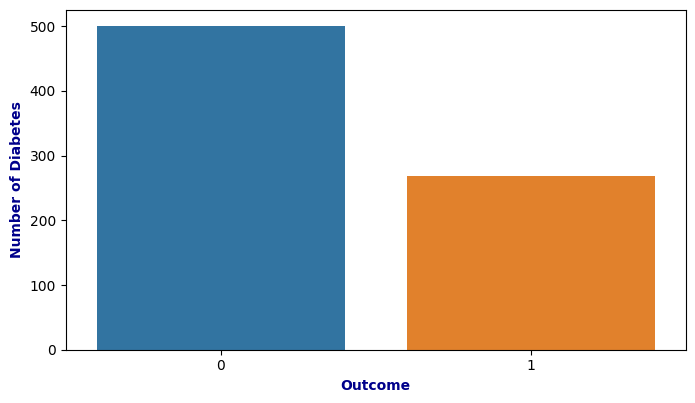

In [ ]:
sns.countplot(x=diabetes.Outcome ,data=diabetes)
plt.xlabel("Outcome",fontdict=axis_font)
plt.ylabel("Number of Diabetes",fontdict=axis_font)
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


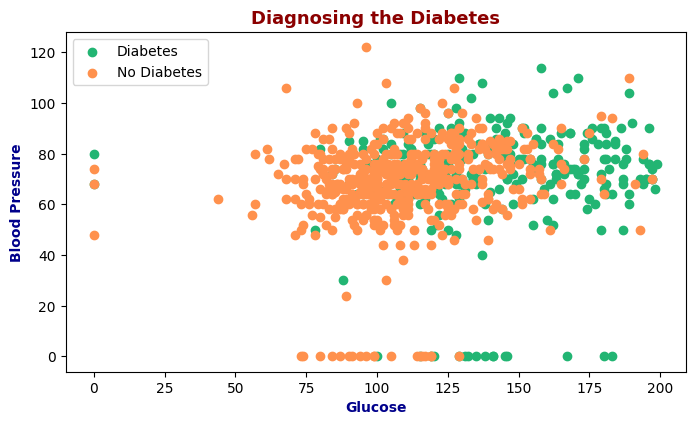

In [ ]:
plt.scatter(
    diabetes[diabetes['Outcome'] == 1].Glucose,
    diabetes[diabetes['Outcome'] == 1].BloodPressure,
    color='#22B573'
)
plt.scatter(
    diabetes[diabetes['Outcome'] == 0].Glucose,
    diabetes[diabetes['Outcome'] == 0].BloodPressure,
    color='#FF914D'
)
plt.legend(['Diabetes', 'No Diabetes'])
plt.title('Diagnosing the Diabetes',fontdict=title_font)
plt.xlabel('Glucose',fontdict=axis_font)
plt.ylabel('Blood Pressure',fontdict=axis_font)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = diabetes[['Glucose', 'BloodPressure']]
Y = diabetes.Outcome
neighbors.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)#, stratify=y)

In [ ]:
X_test.head(20)

,Glucose,BloodPressure
668,98,58
324,112,75
624,108,64
690,107,80
473,136,90
204,103,72
97,71,48
336,117,0
568,154,72
148,147,78


In [ ]:
X_test.iloc[10:20]

,Glucose,BloodPressure
667,111,70
212,179,95
199,148,60
265,96,74
760,88,58
356,125,50
501,84,72
457,86,68
604,183,0
213,140,65


In [ ]:
test_values = X_test.iloc[10:20].values
neighbors.predict(test_values)

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [ ]:
neighbors5 = KNeighborsClassifier(n_neighbors=5)
X = diabetes[['Glucose', 'BloodPressure']]
Y = diabetes.Outcome
neighbors5.fit(X,Y)
## Predict for a Glucose level of 150 and Blood Pressure of 59.
print(neighbors5.predict([[150, 59]]))
print(neighbors5.predict_proba([[150, 59]]))

[0]
[[0.8 0.2]]


In [ ]:
for BloodPressure in range (50,60,1):
    predict = neighbors5.predict([[150, BloodPressure]])[0]
    print('Blood Pressure: {}, Predict : {}'.format(BloodPressure, predict) )

Blood Pressure: 50, Predict : 0
Blood Pressure: 51, Predict : 0
Blood Pressure: 52, Predict : 1
Blood Pressure: 53, Predict : 1
Blood Pressure: 54, Predict : 1
Blood Pressure: 55, Predict : 1
Blood Pressure: 56, Predict : 0
Blood Pressure: 57, Predict : 0
Blood Pressure: 58, Predict : 0
Blood Pressure: 59, Predict : 0


### K-MEANS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset =pd.read_csv('https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = dataset.iloc[:,[1,2]].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

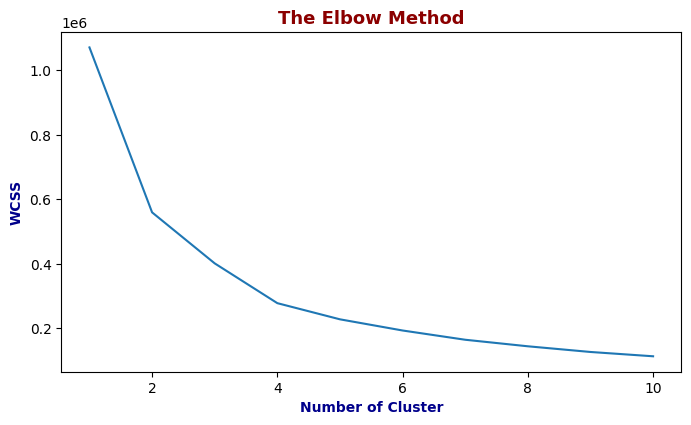

In [ ]:
plt.plot(kume_sayisi_listesi, wcss)
plt.title('The Elbow Method',fontdict=title_font)
plt.xlabel('Number of Cluster',fontdict=axis_font)
plt.ylabel('WCSS',fontdict=axis_font)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

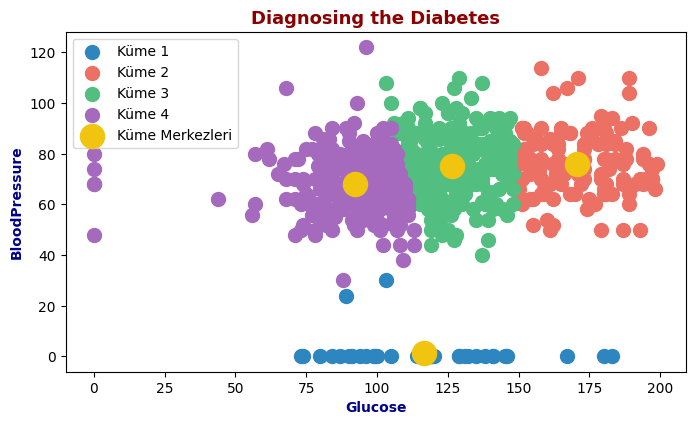

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = '#2E86C1', label = 'Küme 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = '#EC7063', label = 'Küme 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = '#52BE80', label = 'Küme 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = '#A569BD', label = 'Küme 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = '#F1C40F', label = 'Küme Merkezleri')
plt.title('Diagnosing the Diabetes',fontdict=title_font)
plt.xlabel('Glucose',fontdict=axis_font)
plt.ylabel('BloodPressure',fontdict=axis_font)
plt.legend()
plt.show()